In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [103]:
path = "data.csv"
df = pd.read_csv(path)
df.head()

,x,y
0,0.210,2.000
1,1.930,1.780
2,0.885,0.141
3,1.610,1.890
4,1.510,1.230


In [104]:
data = df.to_numpy()
print(data.shape)
print(data)

(1200, 2)
[[ 0.21   2.   ]
 [ 1.93   1.78 ]
 [ 0.885  0.141]
 ...
 [13.8    4.76 ]
 [13.2    4.22 ]
 [12.6    4.78 ]]


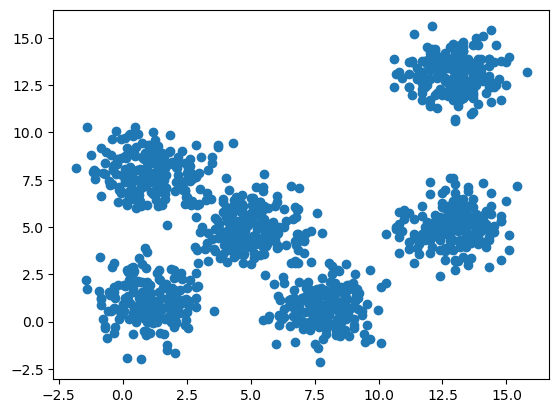

In [105]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [106]:
k = 5
random_indices = np.random.choice(data.shape[0], k, replace= False)
random_indices

array([603, 402, 252, 100, 388])

In [107]:
centers = data[random_indices]
print(centers)

[[ 0.88   7.7  ]
 [ 5.68   0.161]
 [ 3.97   4.07 ]
 [-0.33   0.726]
 [ 4.18   5.08 ]]


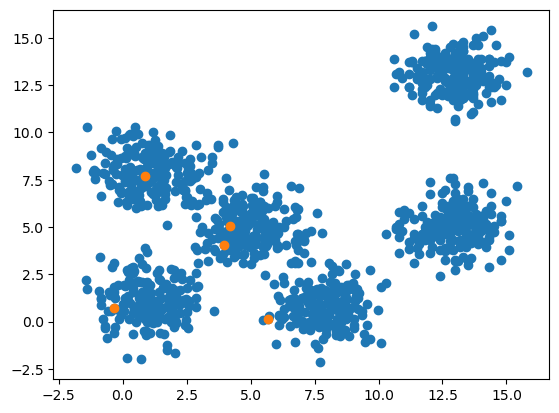

In [108]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(centers[:,0], centers[:,1])

In [109]:
def calculate_distance(a, b):
    dist = 0
    for x, y in zip(a, b):
        dist += (x - y) ** 2
    return dist**0.5

In [110]:
distance = np.zeros((data.shape[0], k))
closure = np.zeros((data.shape[0]))

In [111]:
m = 0
while True:
    m = m + 1
    print(f"-------------it:{m}---------")
    for i, d in enumerate(data):
        for j, c in enumerate(centers):
            distance[i, j] = calculate_distance(d, c)
    new_closure = np.argmin(distance, axis=1)
    new_centers = np.zeros((k, data.shape[1]))
    for i, c in enumerate(centers):
        y = new_closure == i
        s = data[new_closure == i, :]
        new_centers[i, :] = np.sum(s, axis=0) / s.shape[0]
        print(f"centroid:{i+1} closure:{y} data:{s}")
    centers = new_centers.copy()

    print(f"closure:{new_closure} | old_closure:{closure} | centers:{new_centers}")
    if np.all(new_closure == closure):
        break
    closure = new_closure.copy()

-------------it:1---------
centroid:1 closure:[False False False ... False False False] data:[[-0.395   9.64  ]
 [ 1.45    7.99  ]
 [ 2.54    8.14  ]
 [ 0.88    7.7   ]
 [ 0.853   8.59  ]
 [ 2.44    6.92  ]
 [ 1.53    8.92  ]
 [ 0.189   9.2   ]
 [-0.046   6.79  ]
 [ 1.92    8.4   ]
 [ 0.113   7.39  ]
 [ 2.13    8.3   ]
 [ 4.3     9.45  ]
 [-1.08    7.56  ]
 [-0.633   8.95  ]
 [ 1.6     7.64  ]
 [ 1.14    7.53  ]
 [ 1.7     7.08  ]
 [ 1.63    6.92  ]
 [ 2.11    8.44  ]
 [ 2.65    8.23  ]
 [ 1.37    6.85  ]
 [-0.0724  9.64  ]
 [ 1.19    9.07  ]
 [ 1.37    7.69  ]
 [-0.422   7.28  ]
 [ 1.84    9.    ]
 [-0.55    7.45  ]
 [-0.187   6.34  ]
 [ 1.26    8.42  ]
 [ 1.31    7.92  ]
 [ 0.424   6.48  ]
 [-0.767   7.87  ]
 [ 1.38    7.17  ]
 [ 0.771   7.11  ]
 [ 0.586   9.9   ]
 [ 0.48   10.3   ]
 [ 2.08    7.38  ]
 [ 0.53    9.25  ]
 [ 0.402   9.82  ]
 [ 2.86    7.67  ]
 [ 2.85    9.34  ]
 [ 0.872   7.25  ]
 [ 0.298   8.18  ]
 [ 1.6     7.75  ]
 [ 1.48    8.49  ]
 [ 0.634   6.69  ]
 [ 0.746   7.1

In [112]:
closure

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

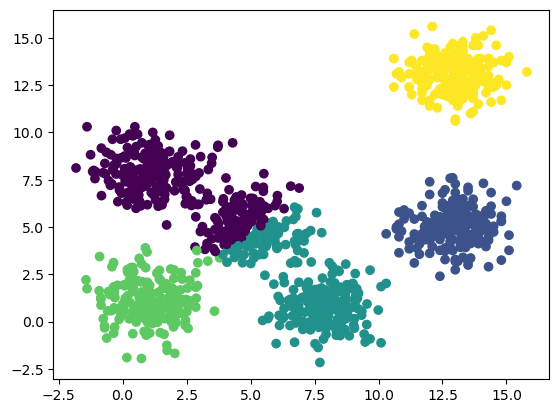

In [113]:
plt.scatter(data[:, 0], data[:, 1], c=closure)